# LASSO

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r'./data/Credit.csv',index_col=0)
print(data.shape)
data.head()

(400, 11)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
X = data[['Income','Limit','Rating','Student']]
y = data['Balance']

In [4]:
X['Student'] = X['Student'].map({'Yes':1,'No':0})
X.head()

<ipython-input-4-f93cd4427c13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Student'] = X['Student'].map({'Yes':1,'No':0})


,Income,Limit,Rating,Student
1,14.891,3606,283,0
2,106.025,6645,483,1
3,104.593,7075,514,0
4,148.924,9504,681,0
5,55.882,4897,357,0


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Linear regression (least square fit)
lr = LinearRegression()
lr.fit(X_scaled,y)
print('Intercept is ',lr.intercept_)
print('Coef are ',lr.coef_)

Intercept is  520.015
Coef are  [-279.65262476  280.51607343  338.48984662  126.80051361]


In [7]:
# Lasso
lasso = Lasso(alpha = 1)
lasso.fit(X_scaled,y)
print('Intercept is ',lasso.intercept_)
print('Coef are ',lasso.coef_)

Intercept is  520.015
Coef are  [-274.81085729  282.07100696  332.10587107  125.70186799]


#### we can see for alpha = 1, we are having almost same value, there is very less effect of regularization

In [8]:
#increasing the values of alpha
lasso = Lasso(alpha = 10)
lasso.fit(X_scaled,y)
print('Intercept is ',lasso.intercept_)
print('Coef are ',lasso.coef_)
# see the values decreasing, and moving towards zero

Intercept is  520.015
Coef are  [-230.81163473  248.47592676  321.75567292  115.61500508]


In [9]:
# Large value of alpha
lasso = Lasso(alpha = 1000)
lasso.fit(X_scaled,y)
print('Intercept is ',lasso.intercept_)
print('Coef are ',lasso.coef_)
# all the values are 0 now. 

Intercept is  520.015
Coef are  [0. 0. 0. 0.]


https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [10]:
alpha = [1e-1,1e1,1e2,1e5,1e7,1e9]
intercept_dict = {}

for a in alpha:
  lasso = Lasso(alpha = a)
  lasso.fit(X_scaled,y)
  intercept_dict[a] = list(lasso.coef_)

In [11]:
tmp = pd.DataFrame(intercept_dict).T
tmp.index = alpha
tmp

,0,1,2,3
1.000000e-01,-279.210780,285.430515,333.140891,126.710554
1.000000e+01,-230.811635,248.475927,321.755673,115.615005
1.000000e+02,-0.000000,23.363521,273.311885,19.631380
1.000000e+05,0.000000,0.000000,0.000000,0.000000
1.000000e+07,0.000000,0.000000,0.000000,0.000000
1.000000e+09,0.000000,0.000000,0.000000,0.000000


Text(0.5, 0, 'Alpha')

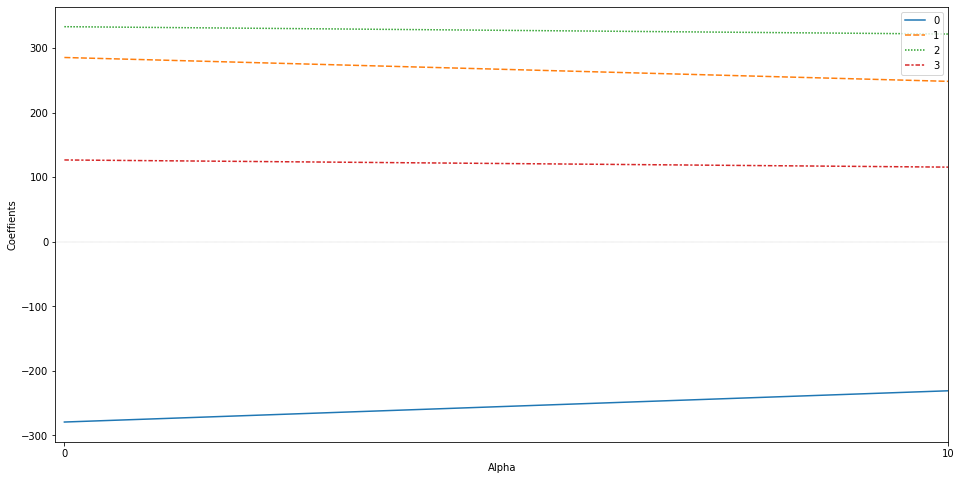

In [12]:
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
plt.xticks(alpha)
plt.xlim(0,10)
plt.ylabel('Coeffients')
plt.xlabel('Alpha')

Text(0.5, 0, 'Alpha')

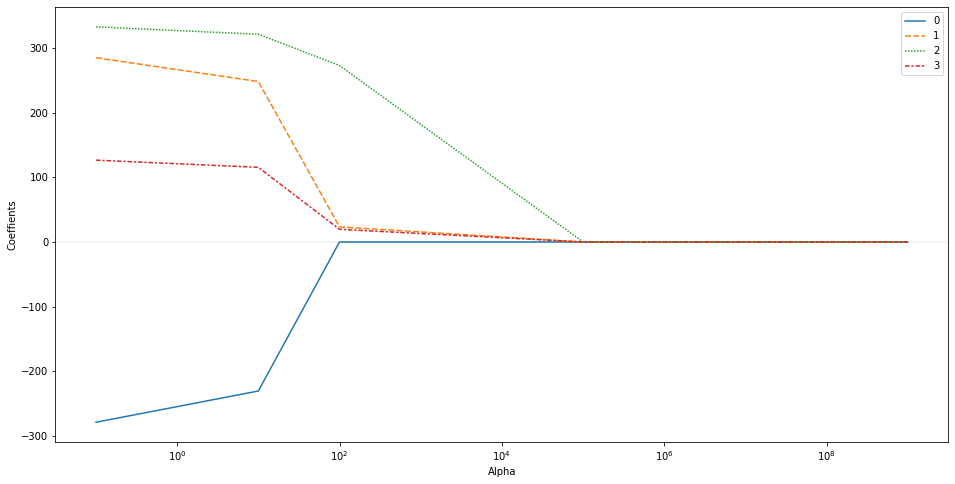

In [13]:
# using log scale for x axis

plt.figure(figsize = (16,8))
sns.lineplot(data = tmp)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
plt.xticks(alpha)
plt.xscale('log')
plt.ylabel('Coeffients')
plt.xlabel('Alpha')

#### the graphs are not smooth as i have choosen less